<a href="https://colab.research.google.com/github/tirth-jarsania/Deep-Learning/blob/main/feedforwardNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , mean_squared_error , log_loss
from tqdm import tqdm_notebook
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs
import math

In [ ]:
class SigmoidNeuron:

  def __init__(self):
    self.w = None
    self.b = None

  def perceptron(self , x):
    return np.dot(x, self.w.T) + self.b

  def sigmoid(self ,x):
    return 1.0/(1.0 + np.exp(-x))

  def grad_w_mse( self, x, y ):
    y_pred = self.sigmoid( self.perceptron(x) )
    return ( y_pred - y ) * y_pred * ( 1 - y_pred ) * x

  def grad_b_mse( self, x, y ):
    y_pred = self.sigmoid( self.perceptron(x) )
    return ( y_pred - y ) * y_pred * ( 1 - y_pred ) 

  def grad_w_ce( self, x, y ):
    y_pred = self.sigmoid( self.perceptron(x) )
    if y == 0:
      return y_pred * x
    elif y == 1 :
      return -1 * (1-y_pred) * x
    else:
      raise ValueError("y will be 0 or 1")

  def grad_b_ce( self, x, y ):
    y_pred = self.sigmoid( self.perceptron(x) )
    if y == 0:
      return y_pred 
    elif y == 1 :
      return -1 * (1-y_pred) 
    else:
      raise ValueError("y will be 0 or 1")

  def fit( self , X, Y, epochs = 1, learning_rate = 1, initialise = True , loss_fn = "mse" , display_loss = False):

    if initialise :
      self.w = np.random.randn(1,X.shape[1])
      self.b = 0

    if display_loss:
      loss = np.ones( epochs )

    for i in tqdm_notebook(range(epochs) , total = epochs , unit = "epoch" ):
      dw = 0
      db = 0

      for x,y in zip(X,Y) :
        if loss_fn == "mse":
          dw += self.grad_w_mse(x,y)
          db += self.grad_b_mse(x,y)
        else:
          dw += self.grad_w_ce(x,y)
          db += self.grad_b_ce(x,y)
      m = X.shape[1]
      dw /= m
      db /= m
      self.w = self.w - dw * learning_rate
      self.b = self.b - db * learning_rate

      if display_loss:
        Y_pred = self.sigmoid( self.perceptron(X) ) 
        if loss_fn == "mse":
          loss[i] = mean_squared_error(Y,Y_pred)
        else:
          loss[i] = log_loss(Y,Y_pred)

    if display_loss:
      plt.plot(loss)
      plt.xlabel("Epochs")
      if loss_fn == "mse":
        plt.ylabel("Mean Squared Error")
      else:
        plt.ylabel("Log-Loss")
      plt.show()

  def predict(self,X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append( y_pred )
    return np.array(Y_pred)
    

In [ ]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

In [ ]:
data , labels = make_blobs(n_samples=1000, n_features=2, centers=4, random_state=0)
print(data.shape , labels.shape)

(1000, 2) (1000,)


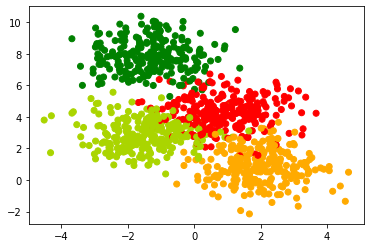

In [ ]:
plt.scatter(data[:,0] , data[:,1] , c=labels , cmap=my_cmap)
plt.show()

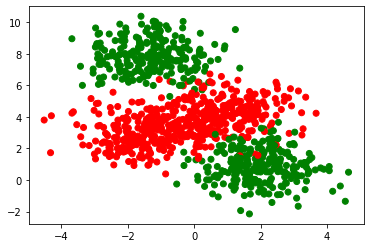

In [ ]:
labels_org = labels
labels = np.mod( labels , 2 )
plt.scatter(data[:,0] , data[:,1] , c=labels , cmap=my_cmap)
plt.show()

In [ ]:
X_train , X_val , Y_train , Y_val = train_test_split( data, labels, stratify =labels, random_state =0)
print( X_train.shape , X_val.shape)

(750, 2) (250, 2)


In [ ]:
sn = SigmoidNeuron()
sn.fit( X_train , Y_train , epochs = 1000 ,learning_rate = 0.8, loss_fn = "ce" , display_loss = True)

In [ ]:
Y_pred_train = sn.predict( X_train )
Y_pred_binarized_train = (Y_pred_train >= 0.5 ).astype( "int" ).ravel()
Y_pred_val = sn.predict( X_val )
Y_pred_binarized_val = (Y_pred_val >= 0.5 ).astype( "int" ).ravel()
accuracy_train = accuracy_score( Y_pred_binarized_train , Y_train )
accuracy_val = accuracy_score( Y_pred_binarized_val , Y_val )


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


getting accuracy for traing and test generated_ data

In [ ]:
print("Training_Accuracy", round(accuracy_train,2))
print("Validation_Accuracy", round(accuracy_val,2))

Training_Accuracy 0.54
Validation_Accuracy 0.51


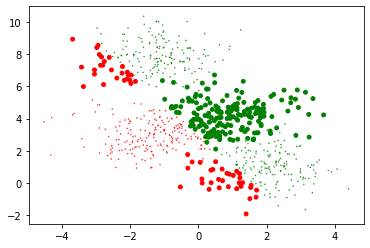

In [ ]:
plt.scatter( X_train[:,0] , X_train[:,1] , c=Y_pred_binarized_train , cmap=my_cmap , s = 15*(Y_pred_binarized_train^Y_train)+0.2)
plt.show() 

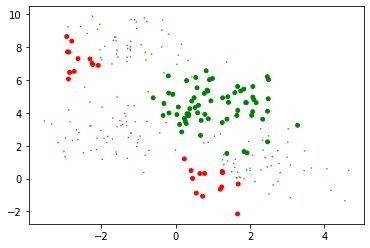

In [ ]:
plt.scatter( X_val[:,0] , X_val[:,1] , c=Y_pred_binarized_val , cmap=my_cmap , s = 15*(Y_pred_binarized_val^Y_val)+0.2)
plt.show() 

We can show that above data isn't linearly seperable so that with the help of sigmoid nueron we can't acheive our best predicition goal. 

In [ ]:
class FirstFFNetwork:

  def __init__(self):
    self.w1 = np.random.randn();
    self.w2 = np.random.randn();
    self.w3 = np.random.randn();
    self.w4 = np.random.randn();
    self.w5 = np.random.randn();
    self.w6 = np.random.randn();
    self.b1 = 0;
    self.b2 = 0;
    self.b3 = 0;

  def sigmoid(self , x):
    return 1.0 / (1.0 + np.exp(-x));

  def forward_pass(self, x):
    self.x1 , self.x2 = x
    self.a1 = self.w1 * self.x1 + self.w2 * self.x2 + self.b1
    self.h1 = self.sigmoid( self.a1 )
    self.a2 = self.w3 * self.x1 + self.w4 * self.x2 + self.b2
    self.h2 = self.sigmoid( self.a2 )
    self.a3 = self.w5 * self.h1 + self.w6 * self.h2 + self.b3
    self.h3 = self.sigmoid( self.a3 )
    return self.h3

  def grad(self , x, y ):
    self.forward_pass(x)

    self.dw5 = (self.h3-y) * self.h3 * (1-self.h3) * self.h1
    self.dw6 = (self.h3-y) * self.h3 * (1-self.h3) * self.h2
    self.db3 = (self.h3-y) * self.h3 * (1-self.h3)

    self.dw1 = (self.h3-y) * self.h3 * (1-self.h3) * self.w5 * self.h1 * (1-self.h1) * self.x1
    self.dw2 = (self.h3-y) * self.h3 * (1-self.h3) * self.w5 * self.h1 * (1-self.h1) * self.x2
    self.db1 = (self.h3-y) * self.h3 * (1-self.h3) * self.w5 * self.h1 * (1-self.h1) 

    self.dw3 = (self.h3-y) * self.h3 * (1-self.h3) * self.w6 * self.h2 * (1-self.h2) * self.x1
    self.dw4 = (self.h3-y) * self.h3 * (1-self.h3) * self.w6 * self.h2 * (1-self.h2) * self.x2
    self.db2 = (self.h3-y) * self.h3 * (1-self.h3) * self.w6 * self.h2 * (1-self.h2) 

  def fit( self , X, Y, epochs = 1, learning_rate = 1, initialise = True , display_loss = False):

    if initialise :
      self.w1 = np.random.randn();
      self.w2 = np.random.randn();
      self.w3 = np.random.randn();
      self.w4 = np.random.randn();
      self.w5 = np.random.randn();
      self.w6 = np.random.randn();
      self.b1 = 0;
      self.b2 = 0;
      self.b3 = 0;

    if display_loss:
      loss = np.ones( epochs )

    for i in tqdm_notebook(range(epochs) , total = epochs , unit = "epoch" ):
      dw1,dw2,dw3,dw4,dw5,dw6 = [0]*6
      db1,db2,db3 = [0]*3

      for x,y in zip(X,Y) :
        self.grad(x,y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3

      m = X.shape[1]
      
      dw1 /= m
      dw2 /= m
      dw3 /= m
      dw4 /= m
      dw5 /= m
      dw6 /= m
      db1 /= m
      db2 /= m
      db3 /= m

      self.w1 = self.w1 - dw1 * learning_rate
      self.w2 = self.w2 - dw2 * learning_rate
      self.w3 = self.w3 - dw3 * learning_rate
      self.w4 = self.w4 - dw4 * learning_rate
      self.w5 = self.w5 - dw5 * learning_rate
      self.w6 = self.w6 - dw6 * learning_rate
      self.b1 = self.b1 - db1 * learning_rate
      self.b2 = self.b2 - db2 * learning_rate
      self.b3 = self.b3 - db3 * learning_rate

      if display_loss:
        Y_pred = self.predict(X) 
        loss[i] = mean_squared_error(Y,Y_pred)

    if display_loss:
      plt.plot(loss)
      plt.xlabel("Epochs")
      plt.ylabel("Mean Squared Error")
      plt.show()

  def predict(self,X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append( y_pred )
    return np.array(Y_pred)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


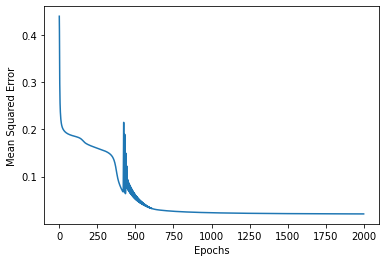

In [ ]:
sn = FirstFFNetwork()
sn.fit( X_train , Y_train , epochs = 2000 ,learning_rate = 0.01, display_loss = True)

In [ ]:
Y_pred_train = sn.predict( X_train )
Y_pred_binarized_train = (Y_pred_train >= 0.5 ).astype( "int" ).ravel()
Y_pred_val = sn.predict( X_val )
Y_pred_binarized_val = (Y_pred_val >= 0.5 ).astype( "int" ).ravel()
accuracy_train = accuracy_score( Y_pred_binarized_train , Y_train )
accuracy_val = accuracy_score( Y_pred_binarized_val , Y_val )

In [ ]:
print("Training_Accuracy", round(accuracy_train,2))
print("Validation_Accuracy", round(accuracy_val,2))

Training_Accuracy 0.98
Validation_Accuracy 0.94


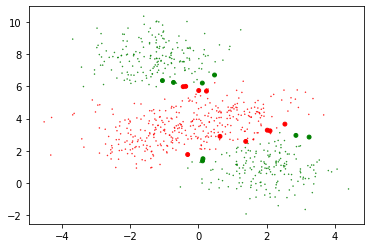

In [ ]:
plt.scatter( X_train[:,0] , X_train[:,1] , c=Y_pred_binarized_train , cmap=my_cmap , s = 15*(Y_pred_binarized_train^Y_train)+0.2)
plt.show() 

In [ ]:
class FFNNetwork:

  def __init__( self, n_inputs , hidden_sizes = [2]): # hidden_sizes basically make using list where each entry define as a how much nueron in that layer
    self.nx = n_inputs
    self.ny = 1
    self.nh = len(hidden_sizes)
    self.sizes = [self.nx] + hidden_sizes + [self.ny]

    self.W = {}
    self.B = {}

    for i in range(self.nh+1):
      self.W[i+1] = np.random.randn(self.sizes[i] , self.sizes[i+1] )
      self.B[i+1] = np.zeros((1, self.sizes[i+1]))

  def sigmoid(self , x):
    return 1.0 / (1.0 + np.exp(-x));

  def forward_pass( self, x):
    self.A = {}
    self.H = {}
    
    self.H[0] = x.reshape(1,-1)

    for i in range(self.nh+1):
      self.A[i+1] = np.matmul( self.H[i] , self.W[i+1] )  + self.B[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])
    return self.H[self.nh+1]

  def grad_sigmoid(self, x):
    return x*(1-x)

  def grad( self, x, y ):
    self.forward_pass(x)
    L = self.nh+1
    self.dW = {}
    self.dB = {}
    self.dH = {}
    self.dA = {}
    
    self.dA[L] = self.H[L] - y
    for k in range(L,0,-1):
      self.dW[k] = np.matmul( self.H[k-1].T , self.dA[k] )
      self.dB[k] = self.dA[k]
      self.dH[k-1] = np.matmul( self.dA[k] , self.W[k].T )
      self.dA[k-1] = np.multiply( self.dH[k-1] , self.grad_sigmoid(self.H[k-1]))

  def fit( self , X, Y, epochs = 1, learning_rate = 1, initialise = True , display_loss = False):
    if initialise :
      for i in range(self.nh+1):
        self.W[i+1] = np.random.randn( self.sizes[i] , self.sizes[i+1] )
        self.B[i+1] = np.zeros((1, self.sizes[i+1]))

    if display_loss:
      loss = np.ones( epochs )

    for e in tqdm_notebook(range(epochs) , total = epochs , unit = "epoch" ):
      
      dW = {}
      dB = {}

      for i in range(self.nh+1):
        dW[i+1] = np.zeros((self.sizes[i] , self.sizes[i+1]) )
        dB[i+1] = np.zeros((1, self.sizes[i+1]))

      for x,y in zip(X,Y) :
        self.grad(x,y)
        for i in range(self.nh+1):
          dW[i+1] += self.dW[i+1]
          dB[i+1] += self.dB[i+1]

      m = X.shape[1]
      
      for i in range(self.nh+1):
        self.W[i+1] -= dW[i+1]/m * learning_rate
        self.B[i+1] -= dB[i+1]/m * learning_rate
      
      if display_loss:
        Y_pred = self.predict(X) 
        loss[e] = mean_squared_error(Y,Y_pred)

    if display_loss:
      plt.plot(loss)
      plt.xlabel("Epochs")
      plt.ylabel("Mean Squared Error")
      plt.show()

  def predict(self,X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append( y_pred )
    return np.array(Y_pred).squeeze()


2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


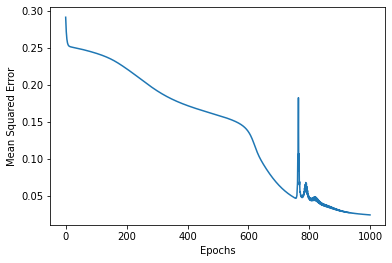

In [ ]:
sn = FFNNetwork(2,[2,3])
print(X_train.ndim)
sn.fit( X_train , Y_train , epochs = 1000 ,learning_rate = 0.001, display_loss = True)

In [ ]:
Y_pred_train = sn.predict( X_train )
Y_pred_binarized_train = (Y_pred_train >= 0.5 ).astype( "int" ).ravel()
Y_pred_val = sn.predict( X_val )
Y_pred_binarized_val = (Y_pred_val >= 0.5 ).astype( "int" ).ravel()
accuracy_train = accuracy_score( Y_pred_binarized_train , Y_train )
accuracy_val = accuracy_score( Y_pred_binarized_val , Y_val )

In [ ]:
print("Training_Accuracy", round(accuracy_train,2))
print("Validation_Accuracy", round(accuracy_val,2))

Training_Accuracy 0.97
Validation_Accuracy 0.94


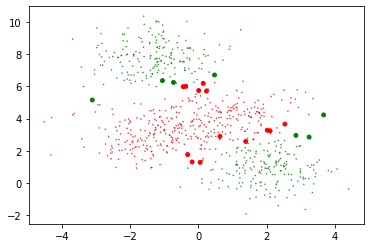

In [ ]:
plt.scatter( X_train[:,0] , X_train[:,1] , c=Y_pred_binarized_train , cmap=my_cmap , s = 15*(Y_pred_binarized_train^Y_train)+0.2)
plt.show() 

Multiple class

In [ ]:
X_train , X_val , Y_train , Y_val = train_test_split( data, labels_org , stratify =labels_org , random_state =0)

[0 2 0 3 2 0 1 3 1 2 1 1 2 3 3 1 0 2 3 3 1 0 2 2 3 3 1 2 2 3 2 2 1 2 0 2 2
 3 2 0 3 2 1 1 2 3 3 2 2 0 0 0 0 0 0 1 3 0 3 0 0 0 3 3 1 2 1 1 0 2 1 3 0 1
 3 1 0 0 2 3 0 2 3 1 2 3 3 0 3 1 2 2 2 3 3 1 2 2 0 3 1 3 1 3 3 1 1 0 1 0 1
 0 3 3 2 3 3 2 1 1 3 3 1 1 3 2 2 2 3 0 2 1 1 0 0 0 3 0 3 1 2 3 1 0 2 2 3 2
 1 0 1 3 1 0 2 0 3 3 0 0 1 2 3 0 1 0 0 1 0 0 3 0 1 1 2 1 1 0 3 1 1 3 2 0 1
 3 2 0 2 1 2 1 1 2 2 0 3 3 1 0 1 3 0 0 1 0 1 2 1 3 0 2 0 1 3 0 2 3 2 3 2 3
 1 0 3 3 1 2 2 3 0 2 0 2 1 2 2 1 2 0 0 0 0 1 1 0 2 1 2 3]


In [ ]:
class FFN_Multiclass:

  def __init__( self, n_inputs , n_outputs, hidden_sizes = [2]): # hidden_sizes basically make using list where each entry define as a how much nueron in that layer
    self.nx = n_inputs
    self.ny = n_outputs
    self.nh = len(hidden_sizes)
    self.sizes = [self.nx] + hidden_sizes + [self.ny]

    self.W = {}
    self.B = {}

    for i in range(self.nh+1):
      self.W[i+1] = np.random.randn(self.sizes[i] , self.sizes[i+1] )
      self.B[i+1] = np.zeros((1, self.sizes[i+1]))

  def sigmoid(self , x):
    return 1.0 / (1.0 + np.exp(-x));

  def forward_pass( self, x):
    self.A = {}
    self.H = {}
    
    self.H[0] = x.reshape(1,-1)

    for i in range(self.nh+1):
      self.A[i+1] = np.matmul( self.H[i] , self.W[i+1] )  + self.B[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])
    self.H[self.nh+1] = self.softmax( self.A[self.nh+1] )
    return self.H[self.nh+1]

  def grad_sigmoid(self, x):
    return x*(1-x)

  def cross_entropy(self, label , pred):
    y = np.multiply(label , pred)
    y = y[y!=0]  # remove the entry whose value is zero
    y = -np.log(y)
    y = np.mean(y)
    return y

  def softmax( self, x):
    exps = np.exp(x)
    return exps / np.sum(exps)

  def grad( self, x, y ):
    self.forward_pass(x)
    L = self.nh+1
    self.dW = {}
    self.dB = {}
    self.dH = {}
    self.dA = {}
    #print(y.shape , self.H[L].shape)
    self.dA[L] = self.H[L] - y
    for k in range(L,0,-1):
      self.dW[k] = np.matmul( self.H[k-1].T , self.dA[k] )
      self.dB[k] = self.dA[k]
      self.dH[k-1] = np.matmul( self.dA[k] , self.W[k].T )
      self.dA[k-1] = np.multiply( self.dH[k-1] , self.grad_sigmoid(self.H[k-1]))

  def fit( self , X, Y, epochs = 1, learning_rate = 1, initialise = True , display_loss = False):
    if initialise :
      for i in range(self.nh+1):
        self.W[i+1] = np.random.randn( self.sizes[i] , self.sizes[i+1] )
        self.B[i+1] = np.zeros((1, self.sizes[i+1]))

    if display_loss:
      loss = np.ones( epochs )

    for e in tqdm_notebook(range(epochs) , total = epochs , unit = "epoch" ):
      
      dW = {}
      dB = {}

      for i in range(self.nh+1):
        dW[i+1] = np.zeros((self.sizes[i] , self.sizes[i+1]) )
        dB[i+1] = np.zeros((1, self.sizes[i+1]))

      for x,y in zip(X,Y) :
        self.grad(x,y)
        for i in range(self.nh+1):
          dW[i+1] += self.dW[i+1]
          dB[i+1] += self.dB[i+1]

      m = X.shape[1]
      
      for i in range(self.nh+1):
        self.W[i+1] -= dW[i+1]/m * learning_rate
        self.B[i+1] -= dB[i+1]/m * learning_rate
      
      if display_loss:
        Y_pred = self.predict(X) 
        loss[e] = self.cross_entropy(Y,Y_pred)

    if display_loss:
      plt.plot(loss)
      plt.xlabel("Epochs")
      plt.ylabel("CE")
      plt.show()

  def predict(self,X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append( y_pred )
    return np.array(Y_pred).squeeze()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


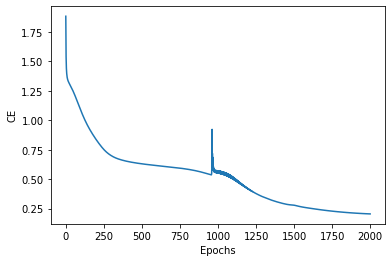

In [ ]:
ffsn_multi = FFN_Multiclass(2,4,[2,4])
ffsn_multi.fit( X_train , Y_OHTrain , epochs = 2000 ,learning_rate = 0.001, display_loss = True)

In [ ]:
Y_pred_train = ffsn_multi.predict( X_train )
Y_pred_train = np.argmax( Y_pred_train , 1)
Y_pred_val = ffsn_multi.predict( X_val )
Y_pred_val = np.argmax( Y_pred_val , 1)

accuracy_train = accuracy_score( Y_pred_train , Y_train )
accuracy_val = accuracy_score( Y_pred_val , Y_val )

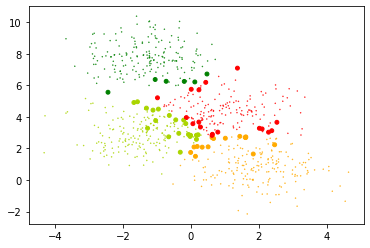

In [ ]:
plt.scatter( X_train[:,0] , X_train[:,1] , c=Y_pred_train , cmap=my_cmap , s = 15*(Y_pred_train!=Y_train)+0.2)
plt.show() 

In [ ]:
print("Training_Accuracy", round(accuracy_train,2))
print("Validation_Accuracy", round(accuracy_val,2))

Training_Accuracy 0.92
Validation_Accuracy 0.94
